In [1]:
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix


In [2]:
wiki = pd.read_json('wikidata-movies.json.gz', orient = 'record', lines = True, encoding="utf-8")
rotten_tomato = pd.read_json('rotten-tomatoes.json.gz', orient = 'record', lines = True).set_index('imdb_id')
genre = pd.read_json('genres.json.gz', orient = 'record', lines = True)
wiki = wiki[['genre','imdb_id','publication_date','wikidata_id']]

wiki_join_tomato = pd.merge(wiki, rotten_tomato, on='imdb_id', how='outer').dropna(how='any')

In [3]:
def to_timestamp_single(date):
	return date.timestamp()
to_timestamp = np.vectorize(to_timestamp_single)

In [4]:
wiki_join_tomato['audience_average'] = wiki_join_tomato['audience_average']/5
wiki_join_tomato['audience_percent'] = wiki_join_tomato['audience_percent']/100
wiki_join_tomato['critic_average'] = wiki_join_tomato['critic_average']/10
wiki_join_tomato['critic_percent'] = wiki_join_tomato['critic_percent']/100

In [5]:
# 12760 movies

In [6]:
wiki_join_tomato = wiki_join_tomato[wiki_join_tomato['audience_ratings'] > 1000].reset_index(drop=True)

In [7]:
wiki_join_tomato['publication_date'] = pd.to_datetime(wiki_join_tomato['publication_date'])
wiki_join_tomato['timestamp'] = wiki_join_tomato['publication_date'].apply(to_timestamp_single)
#check number of genres that each movie contained
#create a columns which shows number of genres included
wiki_join_tomato['number of genres'] = wiki_join_tomato.apply(lambda x: len(x['genre']), axis=1)
#We want to know the maximum of movies 
print("Maximum number of genres in movies: " , wiki_join_tomato['number of genres'].max())

Maximum number of genres in movies:  11


In [8]:
#There are at most 11 genres, generate 11 columns, each column represent 1 specific genre
wiki_join_tomato[['genre1', 'genre2', 'genre3','genre4', 'genre5', 'genre6','genre7', 'genre8', 'genre9','genre10', 'genre11']] = pd.DataFrame(wiki_join_tomato['genre'].values.tolist(), index=wiki_join_tomato.index)
#Joined two table genre and wiki_joint_tomato, we want to match genre_lable to each moive in table wiki_join_tomato
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre1')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre2', rsuffix='g2')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre3',  rsuffix='g3')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre4', rsuffix='g4')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre5', rsuffix='g5')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre6', rsuffix='g6')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre7', rsuffix='g7')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre8', rsuffix='g8')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre9', rsuffix='g9')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre10', rsuffix='g10')
wiki_join_tomato = wiki_join_tomato.join(genre.set_index('wikidata_id'), on ='genre11', rsuffix='g11')
wiki_join_tomato = wiki_join_tomato.drop(['genre1','genre2','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11' ], axis = 1)
genres_count = pd.concat([wiki_join_tomato['genre_label'],wiki_join_tomato['genre_labelg2'], wiki_join_tomato['genre_labelg3'],wiki_join_tomato['genre_labelg4'], wiki_join_tomato['genre_labelg5'], 
wiki_join_tomato['genre_labelg6'], wiki_join_tomato['genre_labelg7'], wiki_join_tomato['genre_labelg8'],wiki_join_tomato['genre_labelg9'], wiki_join_tomato['genre_labelg10'], wiki_join_tomato['genre_labelg11'],])
# print(genres_count.value_counts())
series =  genres_count.value_counts()
# drama film                      4797
# comedy film                     2551
# action film                     1624


In [9]:
# series

# Top three genres that movies producers prefer to produce is drama, comedy and action 
# We are interested in top three movie topics 

In [10]:
drama_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='drama film')|(wiki_join_tomato['genre_labelg2']=='drama film')|(wiki_join_tomato['genre_labelg3']=='drama film')|(wiki_join_tomato['genre_labelg4']=='drama film')|
					(wiki_join_tomato['genre_labelg5']=='drama film')|(wiki_join_tomato['genre_labelg6']=='drama film')|(wiki_join_tomato['genre_labelg7']=='drama film')|(wiki_join_tomato['genre_labelg8']=='drama film')|
					(wiki_join_tomato['genre_labelg9']=='drama film')|(wiki_join_tomato['genre_labelg10']=='drama film')|(wiki_join_tomato['genre_labelg11']=='drama film')]
comedy_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='comedy film')|(wiki_join_tomato['genre_labelg2']=='comedy film')|(wiki_join_tomato['genre_labelg3']=='comedy film')|(wiki_join_tomato['genre_labelg4']=='comedy film')|
					(wiki_join_tomato['genre_labelg5']=='comedy film')|(wiki_join_tomato['genre_labelg6']=='comedy film')|(wiki_join_tomato['genre_labelg7']=='comedy film')|(wiki_join_tomato['genre_labelg8']=='comedy film')|
					(wiki_join_tomato['genre_labelg9']=='comedy film')|(wiki_join_tomato['genre_labelg10']=='comedy film')|(wiki_join_tomato['genre_labelg11']=='comedy film')]
action_film = wiki_join_tomato[(wiki_join_tomato['genre_label']=='action film')|(wiki_join_tomato['genre_labelg2']=='action film')|(wiki_join_tomato['genre_labelg3']=='action film')|(wiki_join_tomato['genre_labelg4']=='action film')|
					(wiki_join_tomato['genre_labelg5']=='action film')|(wiki_join_tomato['genre_labelg6']=='action film')|(wiki_join_tomato['genre_labelg7']=='action film')|(wiki_join_tomato['genre_labelg8']=='action film')|
					(wiki_join_tomato['genre_labelg9']=='action film')|(wiki_join_tomato['genre_labelg10']=='action film')|(wiki_join_tomato['genre_labelg11']=='action film')]

drama_film = drama_film.sort_values('timestamp')
comedy_film = comedy_film.sort_values('timestamp')
action_film = action_film.sort_values('timestamp')

In [11]:
drama_film = drama_film[['audience_average', 'audience_percent','critic_average','critic_percent', 'audience_ratings', 'publication_date', 'timestamp' ]]
comedy_film = comedy_film[['audience_average', 'audience_percent','critic_average','critic_percent', 'audience_ratings', 'publication_date', 'timestamp' ]]
action_film = action_film[['audience_average', 'audience_percent','critic_average','critic_percent', 'audience_ratings', 'publication_date', 'timestamp' ]]

drama_film['pb_year'] = drama_film['publication_date'].dt.year
comedy_film['pb_year'] = comedy_film['publication_date'].dt.year
action_film['pb_year'] = action_film['publication_date'].dt.year

drama_film = drama_film.groupby('pb_year').filter(lambda x: x['pb_year'].count() > 1)
comedy_film = comedy_film.groupby('pb_year').filter(lambda x: x['pb_year'].count() > 1)
action_film = action_film.groupby('pb_year').filter(lambda x: x['pb_year'].count() > 1)

drama_film = drama_film[drama_film['pb_year']!=2018]
comedy_film = comedy_film[comedy_film['pb_year']!=2018]
action_film = action_film[action_film['pb_year']!=2018]

drama_film = drama_film.groupby('pb_year').mean()
comedy_film = comedy_film.groupby('pb_year').mean()
action_film = action_film.groupby('pb_year').mean()
drama_film = drama_film.reset_index()
comedy_film = comedy_film.reset_index()
action_film = action_film.reset_index()

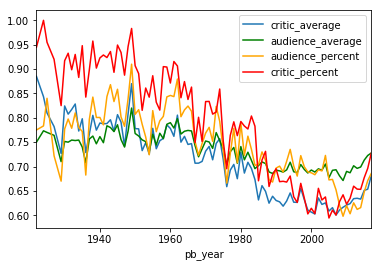

In [12]:
ax = plt.gca()
drama_film.plot(kind='line',x='pb_year',y='critic_average', ax= ax)
drama_film.plot(kind='line',x='pb_year',y='audience_average', color='green', ax= ax)
drama_film.plot(kind='line',x='pb_year',y='audience_percent', color='orange', ax =ax)
drama_film.plot(kind='line',x='pb_year',y='critic_percent', color='red', ax= ax)

In [13]:
print('audience average ratings linear regression slope:', stats.linregress(drama_film['timestamp'],drama_film['audience_average']).slope)
print('audience average ratings linear regression p-value:', stats.linregress(drama_film['timestamp'],drama_film['audience_average']).pvalue)
print('audience percentage linear regression slope:', stats.linregress(drama_film['timestamp'],drama_film['audience_percent']).slope)
print('audience percentage linear regression p-value:', stats.linregress(drama_film['timestamp'],drama_film['audience_percent']).pvalue)
print('critic average ratings linear regression slope:', stats.linregress(drama_film['timestamp'],drama_film['critic_average']).slope)
print('critic average ratings linear regression p-value:', stats.linregress(drama_film['timestamp'],drama_film['critic_average']).pvalue)
print('critic percentage linear regression slope:', stats.linregress(drama_film['timestamp'],drama_film['critic_percent']).slope)
print('critic percentage linear regression p-value:', stats.linregress(drama_film['timestamp'],drama_film['critic_percent']).pvalue)

audience average ratings linear regression slope: -3.017652619115236e-11
audience average ratings linear regression p-value: 8.699791368747074e-18
audience percentage linear regression slope: -6.092529716993209e-11
audience percentage linear regression p-value: 2.7019374029857784e-17
critic average ratings linear regression slope: -7.821784956533465e-11
critic average ratings linear regression p-value: 1.338812819116697e-35
critic percentage linear regression slope: -1.2602682634519578e-10
critic percentage linear regression p-value: 1.155525246983304e-37


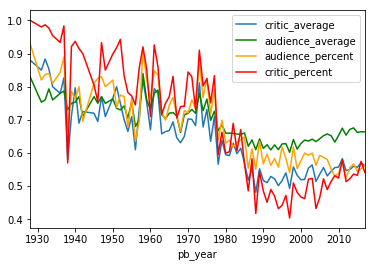

In [14]:
ax = plt.gca()
comedy_film.plot(kind='line',x='pb_year',y='critic_average', ax= ax)
comedy_film.plot(kind='line',x='pb_year',y='audience_average', color='green', ax= ax)
comedy_film.plot(kind='line',x='pb_year',y='audience_percent', color='orange', ax =ax)
comedy_film.plot(kind='line',x='pb_year',y='critic_percent', color='red', ax= ax)

In [15]:
print('audience average ratings linear regression slope:', stats.linregress(comedy_film['timestamp'],comedy_film['audience_average']).slope)
print('audience average ratings linear regression p-value:', stats.linregress(comedy_film['timestamp'],comedy_film['audience_average']).pvalue)
print('audience percentage linear regression slope:', stats.linregress(comedy_film['timestamp'],comedy_film['audience_percent']).slope)
print('audience percentage linear regression p-value:', stats.linregress(comedy_film['timestamp'],comedy_film['audience_percent']).pvalue)
print('critic average ratings linear regression slope:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_average']).slope)
print('critic average ratings linear regression p-value:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_average']).pvalue)
print('critic percentage linear regression slope:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_percent']).slope)
print('critic percentage linear regression p-value:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_percent']).pvalue)

audience average ratings linear regression slope: -5.933374758603587e-11
audience average ratings linear regression p-value: 1.739081679240869e-20
audience percentage linear regression slope: -1.1907937243480236e-10
audience percentage linear regression p-value: 3.540880422897056e-25
critic average ratings linear regression slope: -1.1277463260397015e-10
critic average ratings linear regression p-value: 1.1234584126959848e-23
critic percentage linear regression slope: -1.987742967579643e-10
critic percentage linear regression p-value: 7.857818443743522e-27


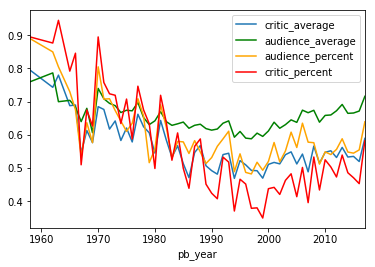

In [16]:
ax = plt.gca()
action_film.plot(kind='line',x='pb_year',y='critic_average', ax= ax)
action_film.plot(kind='line',x='pb_year',y='audience_average', color='green', ax= ax)
action_film.plot(kind='line',x='pb_year',y='audience_percent', color='orange', ax =ax)
action_film.plot(kind='line',x='pb_year',y='critic_percent', color='red', ax= ax)

In [17]:
print('audience average ratings linear regression slope:', stats.linregress(action_film['timestamp'],action_film['audience_average']).slope)
print('audience average ratings linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['audience_average']).pvalue)
print('audience percentage linear regression slope:', stats.linregress(action_film['timestamp'],action_film['audience_percent']).slope)
print('audience percentage linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['audience_percent']).pvalue)
print('critic average ratings linear regression slope:', stats.linregress(action_film['timestamp'],action_film['critic_average']).slope)
print('critic average ratings linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['critic_average']).pvalue)
print('critic percentage linear regression slope:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).slope)
print('critic percentage linear regression p-value:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).pvalue)

audience average ratings linear regression slope: -2.7711490297001165e-11
audience average ratings linear regression p-value: 0.008377878818808741
audience percentage linear regression slope: -1.099442087732023e-10
audience percentage linear regression p-value: 1.9173043735179328e-07
critic average ratings linear regression slope: -9.995176357722928e-11
critic average ratings linear regression p-value: 4.238280251942371e-09
critic percentage linear regression slope: -2.176034456406693e-10
critic percentage linear regression p-value: 2.2404780169313165e-11


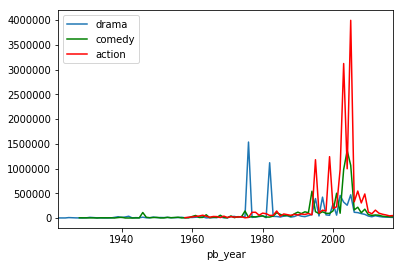

In [18]:
drama_film = drama_film.rename(columns = {'audience_ratings':'drama'})
comedy_film = comedy_film.rename(columns = {'audience_ratings':'comedy'})
action_film = action_film.rename(columns = {'audience_ratings':'action'})

ax = plt.gca()
drama_film.plot(kind='line',x='pb_year',y='drama', ax= ax)
comedy_film.plot(kind='line',x='pb_year',y='comedy', color='green', ax= ax)
action_film.plot(kind='line',x='pb_year',y='action', color='red', ax= ax)

In [19]:
print('count of audience reviews slope:', stats.linregress(drama_film['timestamp'],drama_film['critic_percent']).slope)
print('count of audience reviews p-value:', stats.linregress(drama_film['timestamp'], drama_film['critic_percent']).pvalue)
print('count of audience reviews slope:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_percent']).slope)
print('count of audience reviews p-value:', stats.linregress(comedy_film['timestamp'],comedy_film['critic_percent']).pvalue)
print('count of audience reviews slope:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).slope)
print('count of audience reviews p-value:', stats.linregress(action_film['timestamp'],action_film['critic_percent']).pvalue)

count of audience reviews slope: -1.2602682634519578e-10
count of audience reviews p-value: 1.155525246983304e-37
count of audience reviews slope: -1.987742967579643e-10
count of audience reviews p-value: 7.857818443743522e-27
count of audience reviews slope: -2.176034456406693e-10
count of audience reviews p-value: 2.2404780169313165e-11
